In [1]:
import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Handling large CSVs

Since the input for this data `(data.csv)` is an extremely large CSV file `(1.9 GB)`, I'm going to randomly sample 1 million samples out of it for the purpose of this kernel.

In [3]:
import subprocess
#from https://stackoverflow.com/questions/845058/how-to-get-line-count-cheaply-in-python , Olafur's answer
def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])

lines = file_len('data/chicago-divvy-bicycle-sharing-data/data.csv')
print('Number of lines in "train.csv" is:', lines)

Number of lines in "train.csv" is: 9495236


In [4]:
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)
skiplines=np.sort(skiplines)
print('lines to skip:', len(skiplines))

data = pd.read_csv("data/chicago-divvy-bicycle-sharing-data/data.csv", skiprows=skiplines)

lines to skip: 8495235


In [5]:
data.sample(5)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
180923,4543167,2015,2,8,2,18,Subscriber,Male,2015-02-18 18:04:00,2015-02-18 18:08:00,...,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,212,Wells St & Hubbard St,41.889933,-87.634262,31.0
334893,7461200,2015,9,38,0,17,Subscriber,Male,2015-09-14 17:42:00,2015-09-14 17:49:00,...,174,Canal St & Madison St,41.882091,-87.639833,23.0,346,Ada St & Washington Blvd,41.882830,-87.661206,15.0
635601,12887194,2016,12,49,1,11,Subscriber,Male,2016-12-06 11:26:47,2016-12-06 11:39:04,...,338,Calumet Ave & 18th St,41.857611,-87.619407,15.0,283,LaSalle St & Jackson Blvd,41.878170,-87.631985,31.0
318145,7729669,2015,9,40,1,21,Subscriber,Male,2015-09-29 21:59:00,2015-09-29 22:26:00,...,92,Carpenter St & Huron St,41.894556,-87.653449,19.0,173,Mies van der Rohe Way & Chicago Ave,41.896910,-87.621743,15.0
42048,1476103,2014,4,17,1,14,Subscriber,Male,2014-04-22 14:43:00,2014-04-22 14:49:00,...,202,Halsted St & 18th St,41.857499,-87.646277,15.0,57,Clinton St & Roosevelt Rd,41.867118,-87.641088,15.0


In [6]:
data.isnull().sum(0)

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

In [7]:
num_to_month={
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"June",
    7:"July",
    8:"Aug",
    9:"Sept",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}
data['month'] = data.month.apply(lambda x: num_to_month[x])

**It seems there are no missing values in our randomly sampled population!**

## Ridership Over the last few Years

We can observe an increasing trend!

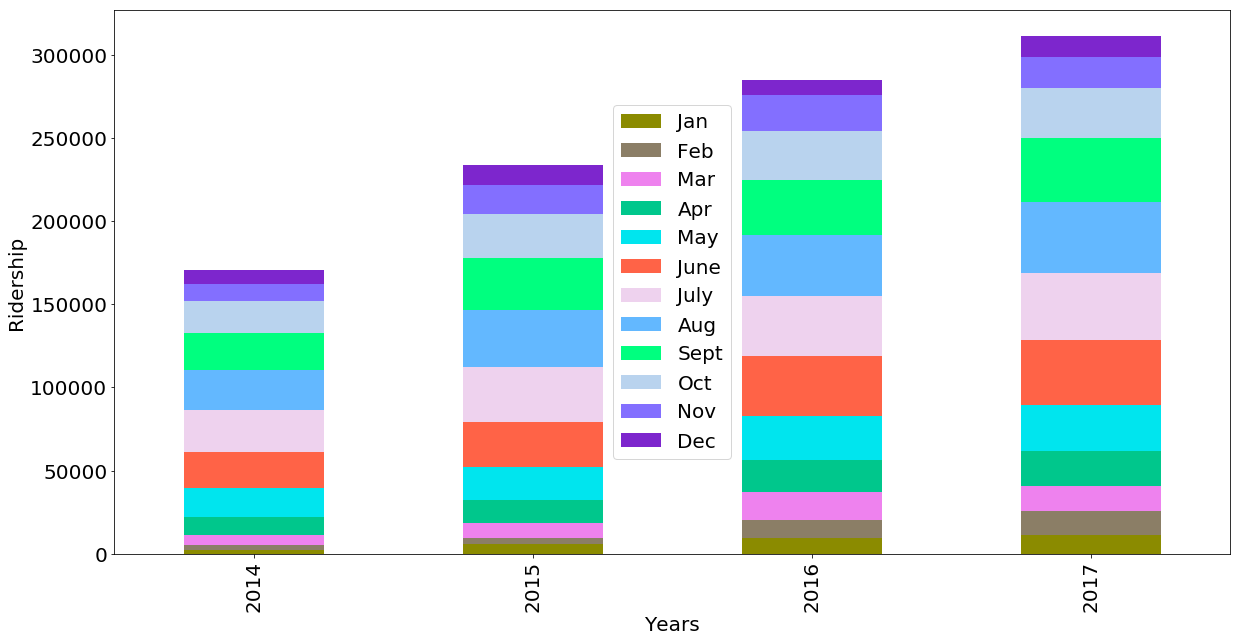

In [8]:
pivot = data.pivot_table(index='year', columns='month', values='day', aggfunc=len)
colors = ["#8B8B00", "#8B7E66", "#EE82EE", "#00C78C", 
          "#00E5EE", "#FF6347", "#EED2EE", 
          "#63B8FF", "#00FF7F", "#B9D3EE", 
          "#836FFF", "#7D26CD"]
pivot.loc[:,['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec']].plot.bar(stacked=True, figsize=(20,10), color=colors)
plt.xlabel("Years")
plt.ylabel("Ridership")
plt.legend(loc=10)
plt.show()

Apart from a gradually increasing tred, during peak months of **June, July, Aug & Sept** ridership seems to be significantly higher than in Holiday months of **Dec & Jan**.

Text(0.5,1,'Type of Customers')

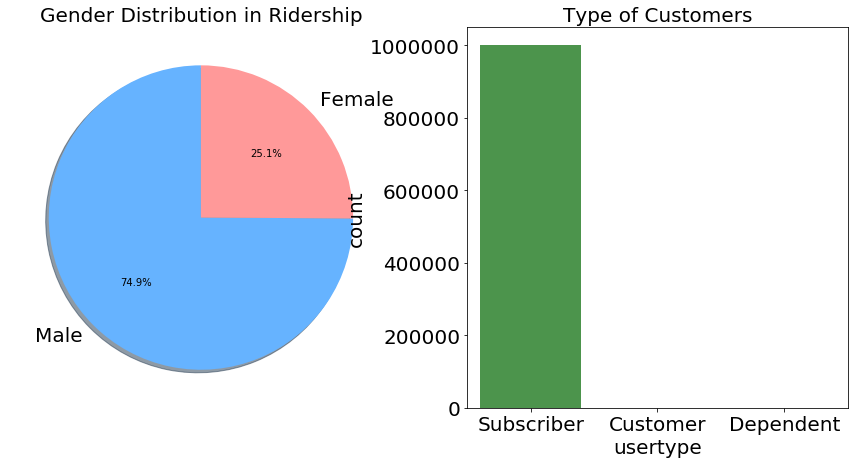

In [9]:
f, ax = plt.subplots(1,2, figsize=(15,7))
colors = ['#66b3ff','#ff9999']
pie = ax[0].pie(list(data['gender'].value_counts()), 
                   labels=list(data.gender.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
count = sns.countplot(x='usertype', data=data, ax=ax[1], color='g', alpha=0.75)
ax[0].set_title("Gender Distribution in Ridership")
ax[1].set_title("Type of Customers")

In [10]:
data.usertype.value_counts()

Subscriber    999859
Customer         121
Dependent         20
Name: usertype, dtype: int64

As it turns out, there are extremely low number of **Customer** or **Dependet** type of riders. It seems most of the riders **prefer annual membership**.

Text(0.5,29.8,'Trip Duration')

<Figure size 1440x720 with 0 Axes>

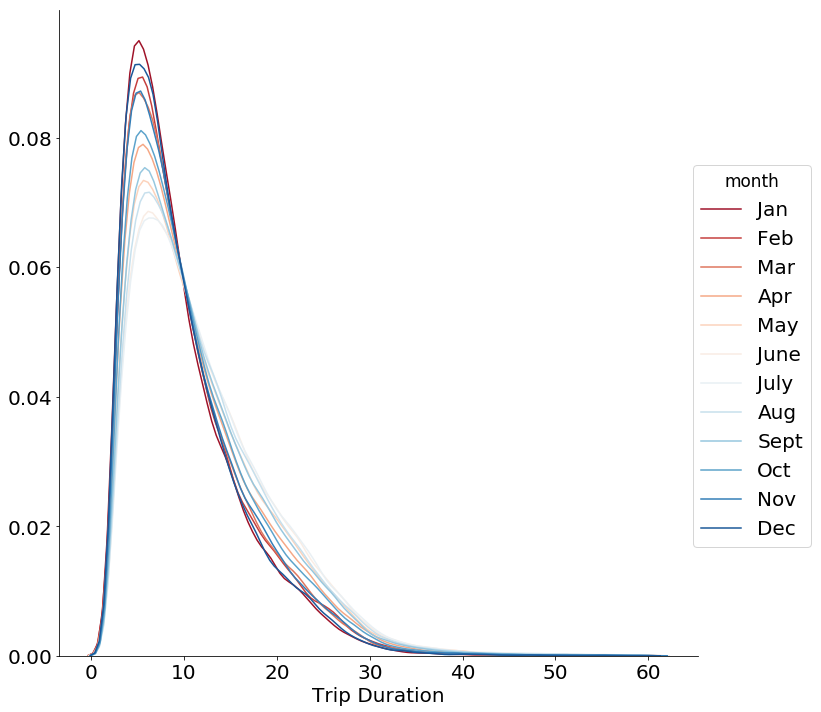

In [11]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(data, hue='month', size=10, hue_order=['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec'], palette="RdBu")
g.map(sns.kdeplot, "tripduration")
g.add_legend()
plt.xlabel("Trip Duration")

In [12]:
station_info = data[['from_station_name','latitude_start','longitude_start']].drop_duplicates(subset='from_station_name')

In [13]:
station_info.sample(5)

,from_station_name,latitude_start,longitude_start
572642,Wabash Ave & 87th St,41.736646,-87.622634
189376,Albany Ave & Bloomingdale Ave,41.914027,-87.705126
339,Hampden Ct & Diversey Pkwy,41.932620,-87.642385
493899,Laramie Ave & Kinzie St,41.887832,-87.755527
192584,Museum of Science and Industry,41.791728,-87.583945


In [14]:
lat_list = list(station_info.latitude_start)
lat_list = [str(i) for i in lat_list]
lon_list = list(station_info.longitude_start)
lon_list = [str(i) for i in lon_list]
names = list(station_info.from_station_name)

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = '' #enter your mapbox token here

data = [
    go.Scattermapbox(
        lat= lat_list,
        lon= lon_list,
        mode='markers',
        marker=dict(
            size=9,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=names,
    )
]

layout = go.Layout(
    title = "Bicycle Sharing Stations in Chicago",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.88,
            lon=-87.62
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Chicago Cycle Sharing Stations')